# Homework 05

### Task 1

Write your own Simpson method to numerically calculate integral 

`my_simps(some_func,a,b,n)`
* some_func
* a: left limit 
* b: right limit
* n: number of segments
for example:

#### for any a,b,n, func

### example

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [2]:
def some_func(x):
    return np.exp(x)

In [3]:
a=1.5
b=2.5
n=4

In [4]:
def my_simps(some_func,a,b,n):
  h = (b-a)/n
  x0 = a
  x1 = x0+h
  x2 = x0+2*h
  x3 = x0+3*h
  x4 = x0+4*h

  I = (h/3)*(some_func(x0)+4*some_func(x1)+2*some_func(x2)+4*some_func(x3)+some_func(x4))
   
  return I

In [5]:
I=my_simps(some_func,a,b,n)
print(I)

7.700970773196655


In [6]:
I_quad,error=integrate.quad(some_func,a,b) # Usando librerías
print(I_quad,error)

7.70080489036541 8.549610897429682e-14


### Task 2

Solve the following integral numerically

$$I = \int_{1}^{9} \frac{b x^2 + x^2 \sqrt(x) - 1}{x^2} dx$$

Initially b=2

Then make a plot for $I$ vs 10 different values of b=[0,1,2,3,4,5,6,7,8,9] 

**Para b=2**

In [7]:
def function(x):
  return (2*x**2+(x**2)*np.sqrt(x)-1)/(x**2)

In [8]:
A = 1
B = 9
n = 10000

In [9]:
def simps(function,A,B,n): # Código escrito en forma general. Acepta cualquier valor para A, B y n.
    h = (B-A)/n
    x0 = A
    x = []
    for i in range(n+1):
      x_i = x0 + i*h
      x.append(x_i)
    x = np.array(x)

    I_sum = function(x[0]) + function(x[-1])

    for j in range(1,len(x)):
      if j%2 == 1:
        I_j =  4*function(x[j]) 
        I_sum = I_sum + I_j
      elif j%2 == 0:
        I_j = 2*function(x[j])
        I_sum = I_sum + I_j
    I = (h/3)*I_sum

    return I

In [10]:
integral = simps(function,A,B,n)
print(integral)

32.447104526748824


In [11]:
I_quad,error=integrate.quad(function,A,B) # Usando librerías
print(I_quad,error)

32.44444444444443 6.278273582403283e-08


**Para b=[0,1,2,3,4,5,6,7,8,9]**

In [12]:
A = 1
B = 9
b = [0,1,2,3,4,5,6,7,8,9]
b = np.array(b)
n = 10000
print(b)

[0 1 2 3 4 5 6 7 8 9]


In [13]:
def funcion(x,c):
  return (c*x**2+(x**2)*np.sqrt(x)-1)/(x**2)

In [14]:
def simps(funcion,A,B,n,c): # Código escrito en forma general. Acepta cualquier valor para A, B, c y n.
    h = (B-A)/n
    x0 = A
    x = []
    for i in range(n+1):
      x_i = x0 + i*h
      x.append(x_i)
    x = np.array(x)

    I_sum = funcion(x[0],c) + funcion(x[-1],c)

    for j in range(1,len(x)):
      if j%2 == 1:
        I_j =  4*funcion(x[j],c) 
        I_sum = I_sum + I_j
      elif j%2 == 0:
        I_j = 2*funcion(x[j],c)
        I_sum = I_sum + I_j
    I = (h/3)*I_sum

    return I

In [15]:
Is = []
for k in b:
  I_i = simps(funcion,A,B,n,k)
  Is.append(I_i)

Is = np.array(Is)
print(Is)

[16.44603786 24.44657119 32.44710453 40.44763786 48.44817119 56.44870453
 64.44923786 72.44977119 80.45030453 88.45083786]


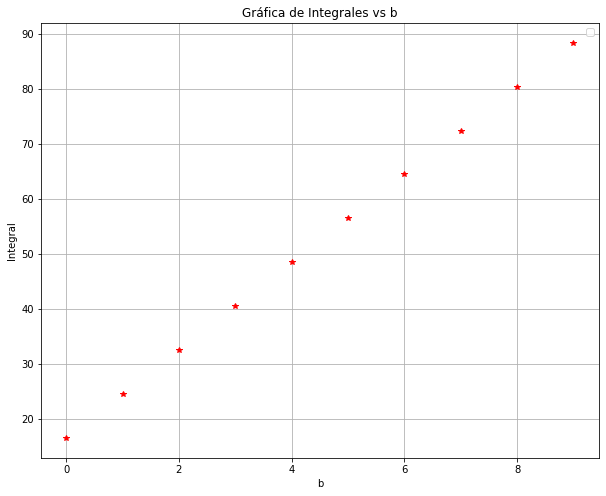

In [16]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.plot(b,Is,'*r')
ax.grid('True')
ax.set_xlabel('b')
ax.set_ylabel('Integral')
plt.title('Gráfica de Integrales vs b')
ax.legend()